In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
#%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
from scipy import ndimage

In [9]:
stacks = [np.mean([ndimage.imread('./PSF_cal/im%s_%s.tiff'%(i,j),flatten = True).astype(np.float64)
                   for j in range(1,4)], axis = 0) for i in range(1,38)]

In [10]:
#note shutter duration in ms
#im<21 3176.137
#im22 1588.0685
#im23 204.022 
#im24 41.060
#im26 204.022
#im29 1588.0685
#im34 3176.137

In [11]:
from ipywidgets import interact

def browse_images(stacks):
    n = len(stacks)
    subfrm = stacks[0]
    imshow(subfrm, cmap=plt.cm.gray, interpolation='none')
    def view_image(i):
        frm = stacks[i]
        subfrm = frm
        imshow(subfrm, cmap=plt.cm.gray, interpolation='none')
        show()
    interact(view_image, i=(0,n-1))

In [12]:
def filter_frame(frm):
    box_size = 200
    y = 248
    x = 155
    subfrm = frm[x:x+box_size,y:y+box_size]
    bkg = np.mean(subfrm[:10,:10])
    subfrm -= bkg
    subfrm[subfrm<0] = 0
    high_im = ndimage.gaussian_filter(subfrm,0.5)
    low_im = ndimage.gaussian_filter(subfrm,25)
    subfrm = high_im-low_im
    subfrm[subfrm<0] = 0
    subfrm = subfrm/np.max(subfrm)
    return subfrm

In [13]:
filtered_images = [filter_frame(fr) for fr in stacks[2:]]

In [14]:
len(filtered_images)

35

In [15]:
values = np.array(filtered_images)

In [16]:
nslices = len(values)

In [53]:
np.linspace(0,34*100,35) - (34*100/2)

array([-1700., -1600., -1500., -1400., -1300., -1200., -1100., -1000.,
        -900.,  -800.,  -700.,  -600.,  -500.,  -400.,  -300.,  -200.,
        -100.,     0.,   100.,   200.,   300.,   400.,   500.,   600.,
         700.,   800.,   900.,  1000.,  1100.,  1200.,  1300.,  1400.,
        1500.,  1600.,  1700.])

In [58]:
grid_z[:,0,9]

array([-178.8       , -175.79495798, -172.78991597, -169.78487395,
       -166.77983193, -163.77478992, -160.7697479 , -157.76470588,
       -154.75966387, -151.75462185, -148.74957983, -145.74453782,
       -142.7394958 , -139.73445378, -136.72941176, -133.72436975,
       -130.71932773, -127.71428571, -124.7092437 , -121.70420168,
       -118.69915966, -115.69411765, -112.68907563, -109.68403361,
       -106.6789916 , -103.67394958, -100.66890756,  -97.66386555,
        -94.65882353,  -91.65378151,  -88.6487395 ,  -85.64369748,
        -82.63865546,  -79.63361345,  -76.62857143,  -73.62352941,
        -70.61848739,  -67.61344538,  -64.60840336,  -61.60336134,
        -58.59831933,  -55.59327731,  -52.58823529,  -49.58319328,
        -46.57815126,  -43.57310924,  -40.56806723,  -37.56302521,
        -34.55798319,  -31.55294118,  -28.54789916,  -25.54285714,
        -22.53781513,  -19.53277311,  -16.52773109,  -13.52268908,
        -10.51764706,   -7.51260504,   -4.50756303,   -1.50252

In [50]:
from scipy.interpolate import RegularGridInterpolator
# focal plane spacing is 100um
# pixel pitch 0.8639 pixels/um = 1.158 um/pixel
pnts = (np.linspace(0,34*100,35) - (34*100/2),
        np.linspace(0,1.158*199,200) - (1.158*199/2.0),
        np.linspace(0,1.158*199,200) - (1.158*199/2.0))

#pnts = (np.linspace(0,10,35),
#        np.linspace(0,1,200),
#        np.linspace(0,1,200))

#1024/1024 image 
grid_z, grid_x, grid_y = np.mgrid[-89.4*2:89.4*2:60*2j,-778.24/2.0:778.24/2.0:1024j, -778.24/2.0:778.24/2.0:1024j]
values = np.array(filtered_images)
PSF = RegularGridInterpolator(pnts, values, method='linear',bounds_error = False,fill_value = 0)

In [51]:
interp = PSF((grid_z,grid_x,grid_y))

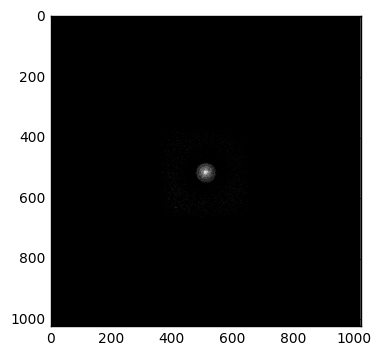

In [52]:
browse_images(interp)

In [15]:
from scipy.interpolate import griddata
#grid_z0 = griddata(points.T, values, (grid_z,grid_x, grid_y), method='linear')

In [104]:
imshow(grid_z0[41],cmap = cm.gray)

In [ ]:
print 'here'

In [177]:
import os

In [189]:
for x in range(33,40):
    for j in range(1,4):
        infile = './PSF_cal/im%s_%s.tiff'%(x,j)
        outfile = './PSF_cal/im%s_%s.tiff'%(x-2,j)
        os.rename(infile,outfile)

In [8]:
ax = subplot(1,1,1)
frm = 0
import time

frm = stacks[0]
subfrm = frm[x:x+box_size,y:y+box_size]
im = ax.imshow(subfrm/np.max(subfrm))
for frm in stacks:
#frm = stacks[20]
    subfrm = frm[x:x+box_size,y:y+box_size]
    im.set_data(subfrm/np.max(subfrm))
    draw()
    time.sleep(0.1)
    #pause(0.01)

In [17]:
tifffiles = [tf for tf in os.listdir('./Point_spread_calibration/') if '.tiff' in tf]

In [19]:
imgs = [ndimage.imread('./Point_spread_calibration/' + tf,flatten = True) for tf in tifffiles]

In [20]:
import time

In [26]:
img = imshow(imgs[0])
for im in imgs:
    img.set_data(im)
    show()
    time.sleep(0.1)

In [ ]:
imshow(imgs[5])